In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [8]:
df=pd.read_csv('diabetes.csv')

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


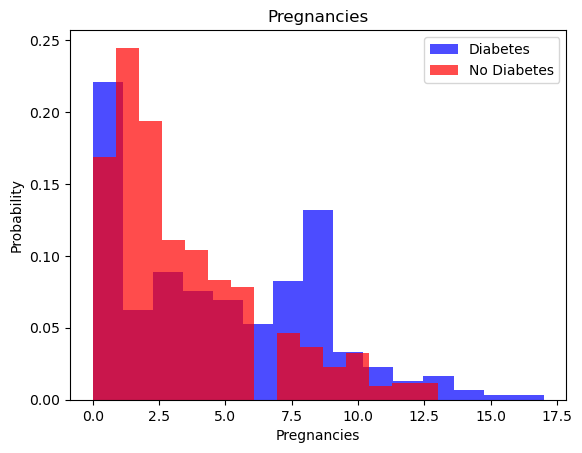

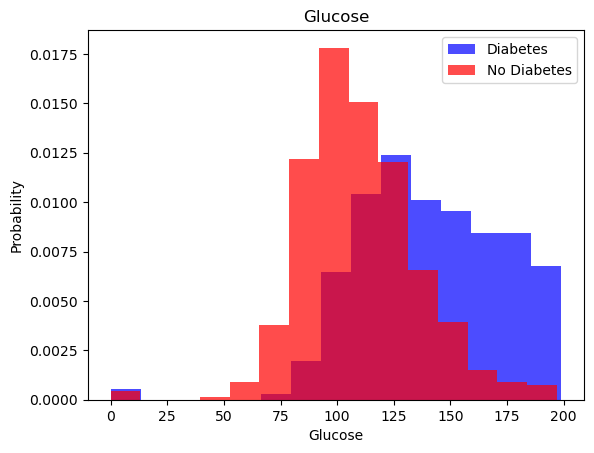

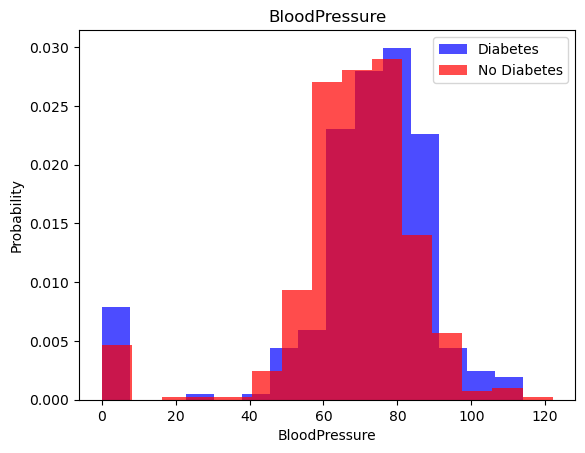

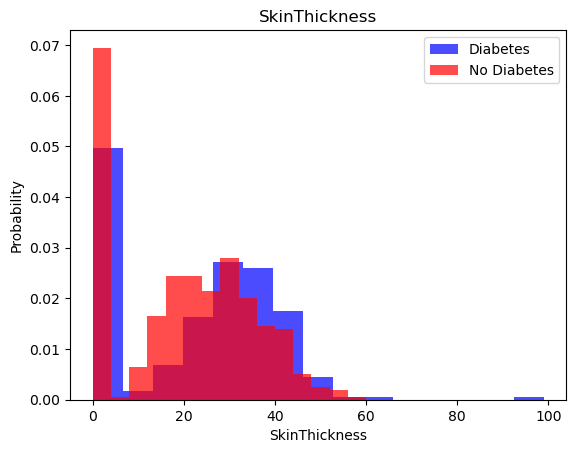

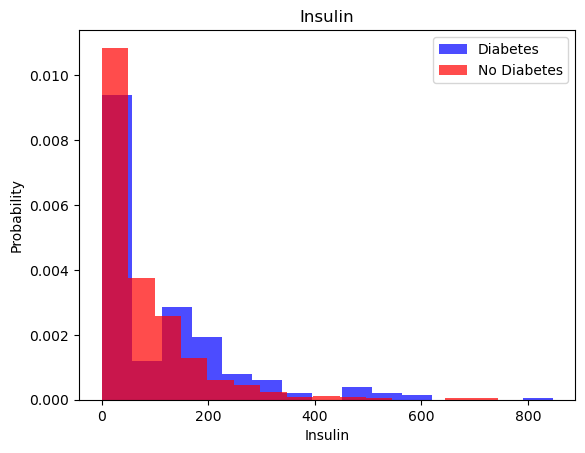

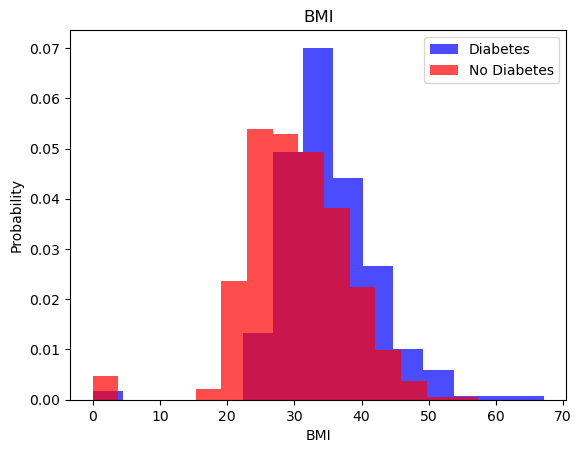

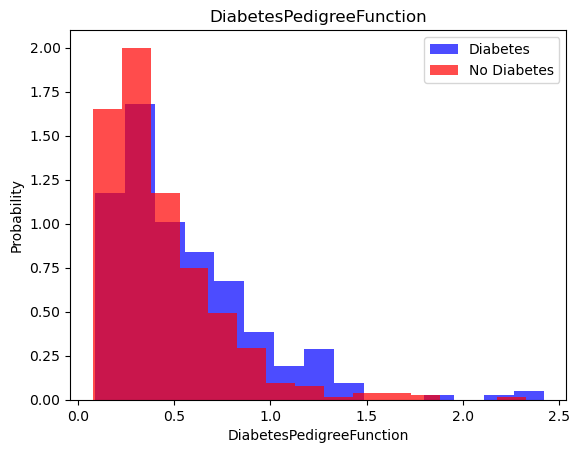

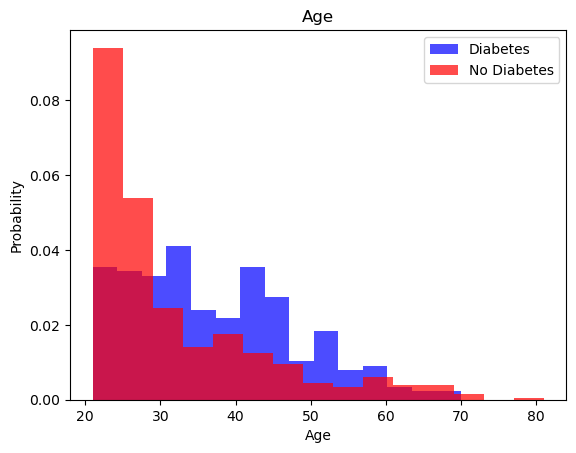

In [19]:
for i in range(len(df.columns[:-1])):
    Label=df.columns[i]
    plt.hist(df[df['Outcome']==1][Label],color='blue',label='Diabetes' ,alpha=0.7 , density=True,bins=15)
    plt.hist(df[df['Outcome']==0][Label],color='red',label='No Diabetes', alpha=0.7, density=True,bins=15)
    plt.title(Label)
    plt.ylabel("Probability")
    plt.xlabel(Label)
    plt.legend()
    plt.show()

In [26]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [36]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [37]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [39]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [41]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4713 - loss: 0.7631


[0.7574675679206848, 0.48500001430511475]

In [42]:
model.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5335 - loss: 0.7421 


[0.7651637196540833, 0.5049999952316284]

In [43]:
model.fit(X_train, y_train, batch_size=16, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5109 - loss: 0.7209 - val_accuracy: 0.6300 - val_loss: 0.6254
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6493 - loss: 0.6366 - val_accuracy: 0.7500 - val_loss: 0.5556
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6938 - loss: 0.5766 - val_accuracy: 0.7650 - val_loss: 0.5169
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6990 - loss: 0.5599 - val_accuracy: 0.7800 - val_loss: 0.4901
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7470 - loss: 0.5144 - val_accuracy: 0.8000 - val_loss: 0.4676
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7389 - loss: 0.5209 - val_accuracy: 0.7950 - val_loss: 0.4516
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7229 - loss: 0.5152 - val_accuracy: 0.8100 - val_loss: 0.4403
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7414 - loss: 0.4845 - val_accuracy: 0.7950 - val_loss

In [44]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.4841 


[0.5001847147941589, 0.7799999713897705]